In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('processed_dulieuxettuyendaihoc.csv')

Phần 1: Thống kê dữ liệu

In [4]:
# 1. Sắp xếp điểm DH1 tăng dần
dh1_sorted = df['DH1'].sort_values()
print("Điểm DH1 tăng dần:\n", dh1_sorted)

Điểm DH1 tăng dần:
 53    1.00
43    1.25
72    1.50
5     1.50
87    1.75
      ... 
84    6.50
11    6.75
23    6.75
24    7.00
97    7.00
Name: DH1, Length: 100, dtype: float64


In [5]:
# 2. Sắp xếp điểm DH2 tăng dần theo nhóm giới tính
dh2_sorted_by_gender = df.sort_values(by=['GT', 'DH2'])
print("\nĐiểm DH2 tăng dần theo nhóm giới tính:\n", dh2_sorted_by_gender[['GT', 'DH2']])


Điểm DH2 tăng dần theo nhóm giới tính:
    GT   DH2
95  F  1.50
25  F  2.00
24  F  2.25
46  F  2.25
13  F  2.75
.. ..   ...
68  M  6.00
11  M  6.50
47  M  6.50
2   M  6.75
97  M  8.00

[100 rows x 2 columns]


In [6]:
# 3, 4, 5. Tạo pivot-table thống kê DH1 theo KT, KV, DT
pivot_dh1_kt = pd.pivot_table(df, values='DH1', index='KT', aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)])
print("\nPivot-table DH1 theo KT:\n", pivot_dh1_kt)

pivot_dh1_kt_kv = pd.pivot_table(df, values='DH1', index=['KT', 'KV'], aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)])
print("\nPivot-table DH1 theo KT và KV:\n", pivot_dh1_kt_kv)

pivot_dh1_kt_kv_dt = pd.pivot_table(df, values='DH1', index=['KT', 'KV', 'DT'], aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)])
print("\nPivot-table DH1 theo KT, KV và DT:\n", pivot_dh1_kt_kv_dt)


Pivot-table DH1 theo KT:
    count     sum      mean median   min   max       std <lambda>             
     DH1     DH1       DH1    DH1   DH1   DH1       DH1      DH1   DH1    DH1
KT                                                                           
A     49  163.50  3.336735   3.25  1.00  6.50  1.274296   2.2500  3.25  4.250
A1     6   17.50  2.916667   3.00  2.00  4.25  0.861201   2.1875  3.00  3.250
B      9   29.50  3.277778   3.50  1.75  4.50  0.823905   3.2500  3.50  3.750
C     14   79.25  5.660714   5.25  4.75  7.00  0.812209   5.0625  5.25  6.375
D1    22   84.25  3.829545   3.75  1.25  6.75  1.370146   3.0000  3.75  4.875

Pivot-table DH1 theo KT và KV:
        count    sum      mean median   min   max       std <lambda>         \
         DH1    DH1       DH1    DH1   DH1   DH1       DH1      DH1    DH1   
KT KV                                                                        
A  1      29  93.75  3.232759  3.250  1.00  6.50  1.369194   2.0000  3.250   
   2

Phần 2: Trình bày dữ liệu


Bảng tần số GT:
 GT
M    52
F    48
Name: count, dtype: int64

Bảng tần suất GT:
 GT
M    52.0
F    48.0
Name: proportion, dtype: float64


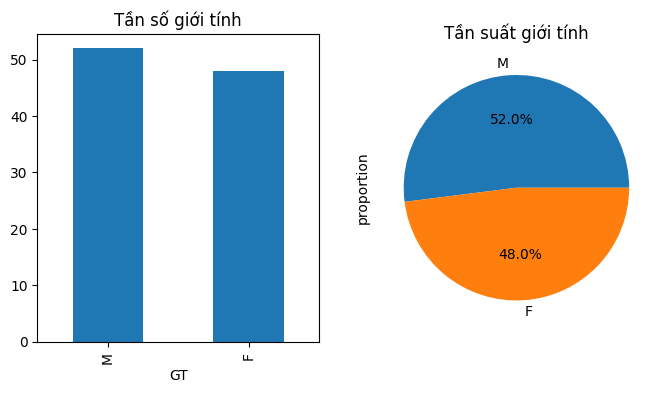

In [7]:
# 1. Trình bày dữ liệu biến GT
gt_freq = df['GT'].value_counts()
gt_percent = df['GT'].value_counts(normalize=True) * 100
print("\nBảng tần số GT:\n", gt_freq)
print("\nBảng tần suất GT:\n", gt_percent)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
gt_freq.plot(kind='bar')
plt.title('Tần số giới tính')

plt.subplot(1, 2, 2)
gt_percent.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tần suất giới tính')
plt.show()


Thống kê US_TBM1:
 count    100.000000
mean       2.434480
std        0.391203
min        1.616000
25%        2.107000
50%        2.480000
75%        2.724000
max        3.232000
Name: US_TBM1, dtype: float64


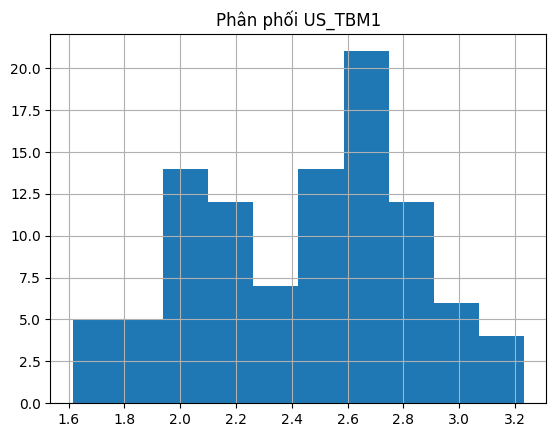


Thống kê US_TBM2:
 count    100.000000
mean       2.559600
std        0.377656
min        1.768000
25%        2.223000
50%        2.588000
75%        2.893000
max        3.416000
Name: US_TBM2, dtype: float64


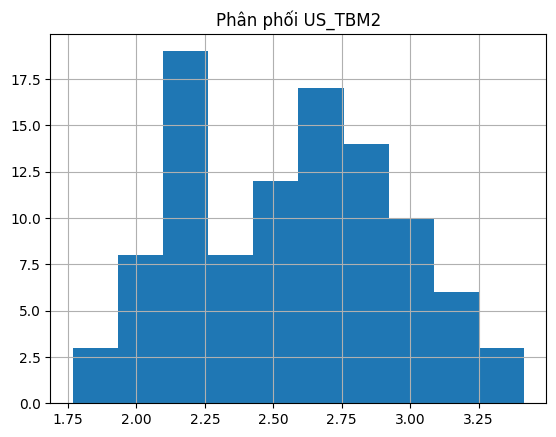


Thống kê US_TBM3:
 count    100.00000
mean       2.67176
std        0.29981
min        1.91600
25%        2.47300
50%        2.70600
75%        2.87400
max        3.31600
Name: US_TBM3, dtype: float64


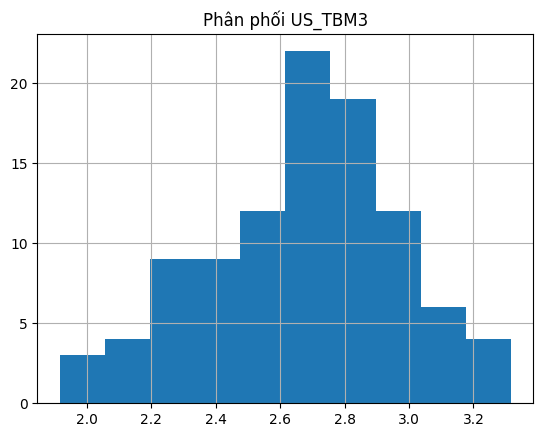

In [8]:
# 2. Trình bày dữ liệu US_TBM1, US_TBM2, US_TBM3
us_tbm_cols = ['US_TBM1', 'US_TBM2', 'US_TBM3']
for col in us_tbm_cols:
    print(f"\nThống kê {col}:\n", df[col].describe())
    plt.figure()
    df[col].hist()
    plt.title(f'Phân phối {col}')
    plt.show()

In [9]:
# 3. Trình bày dữ liệu DT với học sinh nam
nam_dt = df[df['GT'] == 'M']['DT'].value_counts()
print("\nDân tộc học sinh nam:\n", nam_dt)


Dân tộc học sinh nam:
 DT
0.0    50
1.0     1
6.0     1
Name: count, dtype: int64


In [10]:
# 4. Trình bày dữ liệu KV với học sinh nam dân tộc Kinh, DH1>=5, DH2>=4, DH3>=4
nam_kinh_kv = df[(df['GT'] == 'M') & (df['DT'] == 'Kinh') & (df['DH1'] >= 5) & (df['DH2'] >= 4) & (df['DH3'] >= 4)]['KV'].value_counts()
print("\nKhu vực học sinh nam Kinh, DH1>=5, DH2>=4, DH3>=4:\n", nam_kinh_kv)


Khu vực học sinh nam Kinh, DH1>=5, DH2>=4, DH3>=4:
 Series([], Name: count, dtype: int64)


In [11]:
# 5. Trình bày DH1, DH2, DH3 >= 5 và KV 2NT
dh_2nt = df[(df['DH1'] >= 5) & (df['DH2'] >= 5) & (df['DH3'] >= 5) & (df['KV'] == '2NT')][['DH1', 'DH2', 'DH3']]
print("\nDH1, DH2, DH3 >= 5 và KV 2NT:\n", dh_2nt)


DH1, DH2, DH3 >= 5 và KV 2NT:
      DH1   DH2  DH3
23  6.75  5.25  5.0


Phần 3: Trực quan hóa dữ liệu theo nhóm phân loại

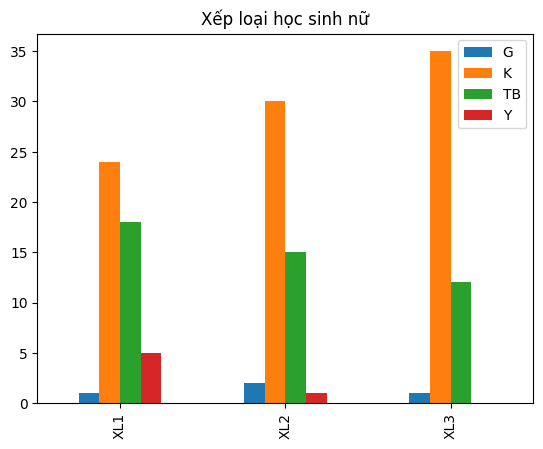

In [12]:
# 1. Học sinh nữ trên các nhóm XL1, XL2, XL3
nu_xl = df[df['GT'] == 'F'][['XL1', 'XL2', 'XL3']].apply(pd.Series.value_counts).T
nu_xl.plot(kind='bar', stacked=False)
plt.title('Xếp loại học sinh nữ')
plt.show()

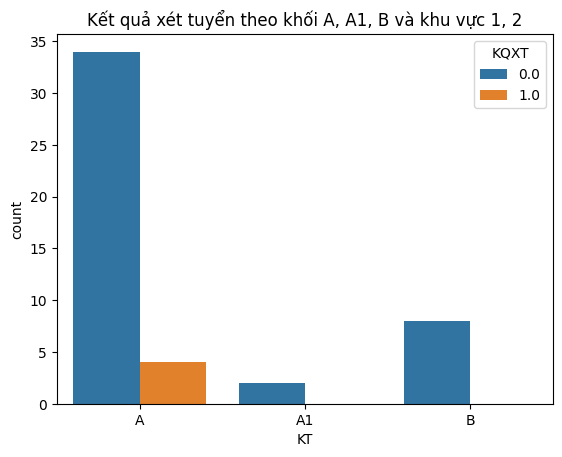

In [13]:
# 2. KQXT trên nhóm học sinh khối A, A1, B thuộc khu vực 1, 2
khối_a_a1_b = df[df['KT'].isin(['A', 'A1', 'B']) & df['KV'].isin(['1', '2'])]
sns.countplot(x='KT', hue='KQXT', data=khối_a_a1_b)
plt.title('Kết quả xét tuyển theo khối A, A1, B và khu vực 1, 2')
plt.show()

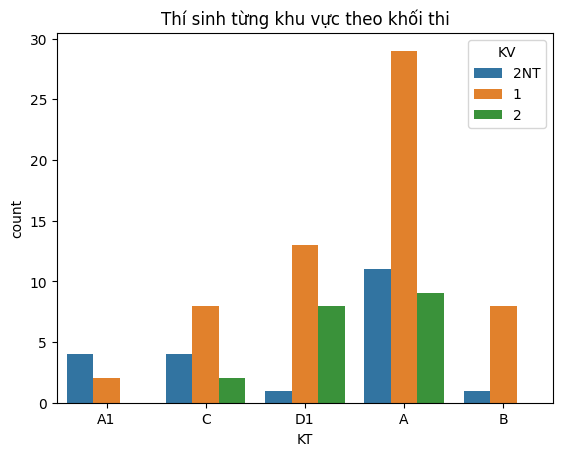

In [14]:
# 3. Thí sinh từng khu vực theo khối thi
sns.countplot(x='KT', hue='KV', data=df)
plt.title('Thí sinh từng khu vực theo khối thi')
plt.show()

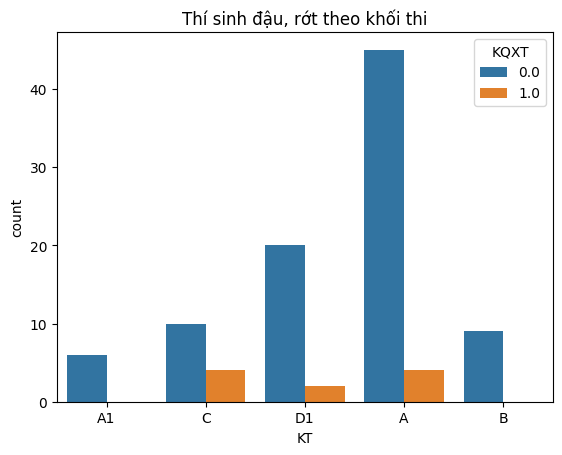

In [15]:
# 4. Thí sinh đậu, rớt theo khối thi
sns.countplot(x='KT', hue='KQXT', data=df)
plt.title('Thí sinh đậu, rớt theo khối thi')
plt.show()

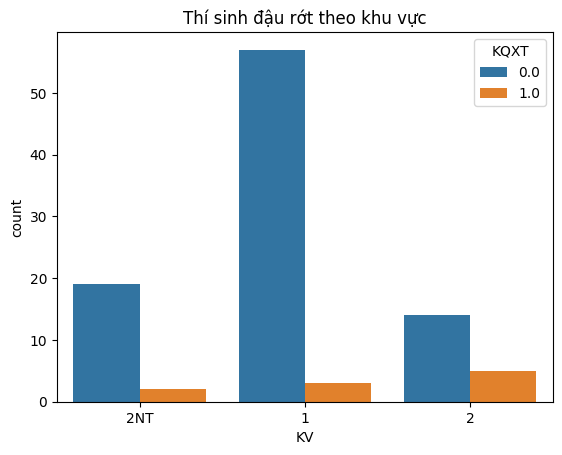

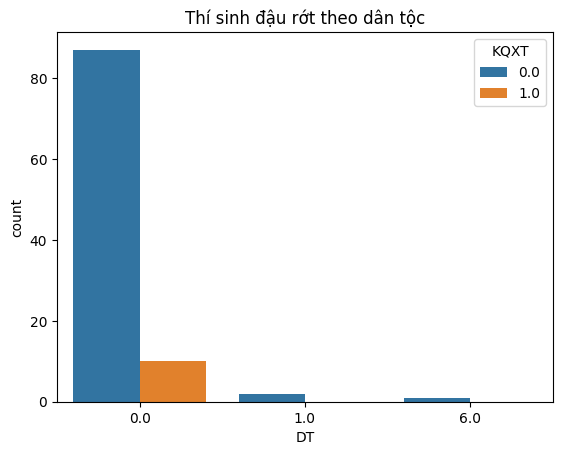

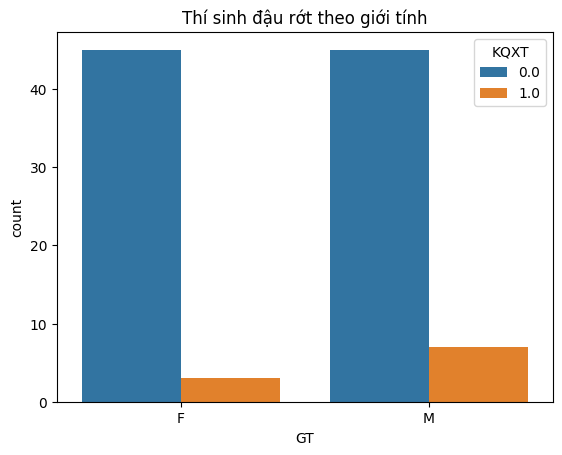

In [16]:
# 5, 6, 7. Thí sinh đậu rớt theo khu vực, dân tộc, giới tính
sns.countplot(x='KV', hue='KQXT', data=df)
plt.title('Thí sinh đậu rớt theo khu vực')
plt.show()

sns.countplot(x='DT', hue='KQXT', data=df)
plt.title('Thí sinh đậu rớt theo dân tộc')
plt.show()

sns.countplot(x='GT', hue='KQXT', data=df)
plt.title('Thí sinh đậu rớt theo giới tính')
plt.show()

Phần 4: Trực quan hóa dữ liệu nâng cao

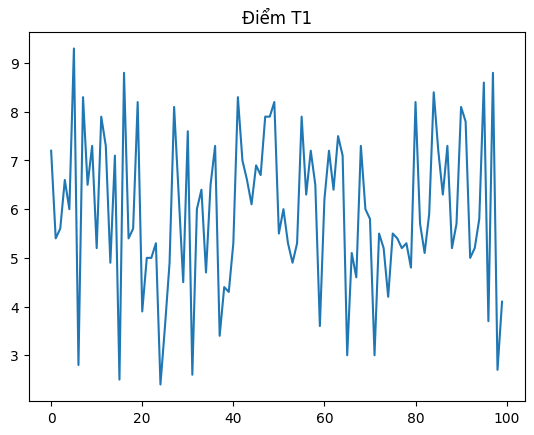

In [17]:
# 1. Biểu đồ đường Simple cho T1
plt.figure()
plt.plot(df['T1'])
plt.title('Điểm T1')
plt.show()

In [19]:
# 2, 3. Biến phân loại phanlopt1
bins = [0, 5, 7, 8, 10]
labels = ['k', 'tb', 'k', 'g']
df['phanlopt1'] = pd.cut(df['T1'], bins=bins, labels=labels, right=False, ordered=False)
print("\nBảng tần số phanlopt1:\n", df['phanlopt1'].value_counts())


Bảng tần số phanlopt1:
 phanlopt1
tb    46
k     42
g     12
Name: count, dtype: int64


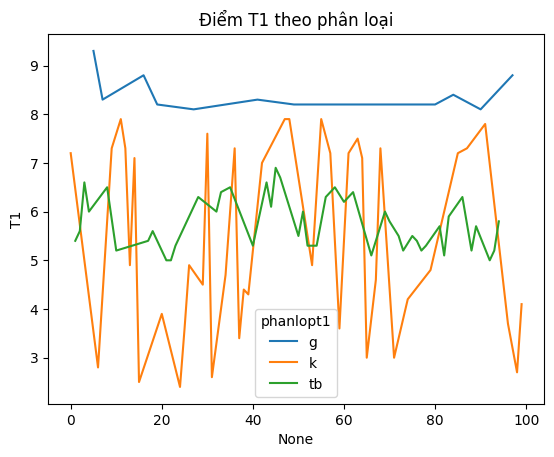

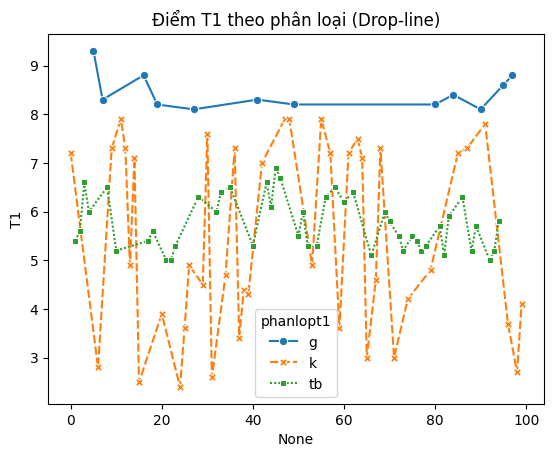

In [20]:
# 4, 5. Biểu đồ đường Multiple Line và Drop-line
plt.figure()
sns.lineplot(x=df.index, y='T1', hue='phanlopt1', data=df)
plt.title('Điểm T1 theo phân loại')
plt.show()

plt.figure()
sns.lineplot(x=df.index, y='T1', hue='phanlopt1', data=df, style='phanlopt1', markers=True)
plt.title('Điểm T1 theo phân loại (Drop-line)')
plt.show()

Phần 5: Mô tả dữ liệu và khảo sát dạng phân phối


Mô tả T1:
 count    100.000000
mean       5.946000
std        1.608338
min        2.400000
25%        5.000000
50%        5.850000
75%        7.200000
max        9.300000
Name: T1, dtype: float64


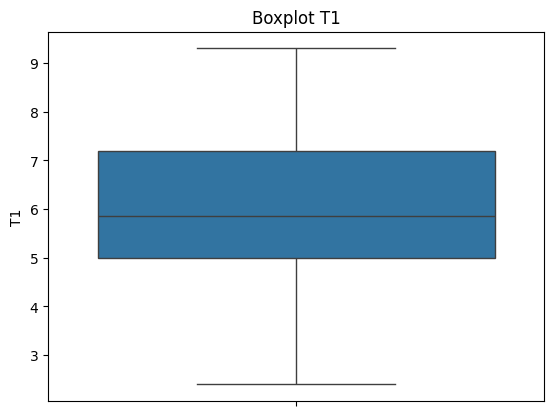

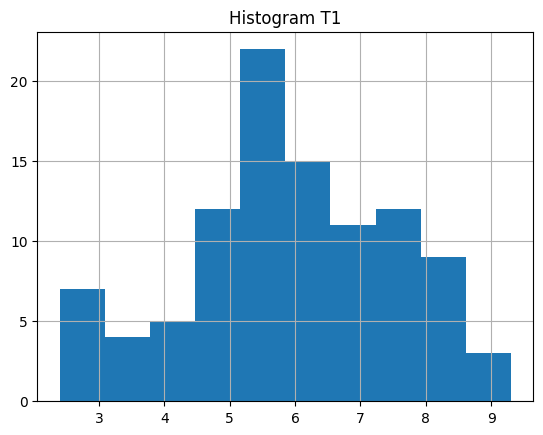

<Figure size 640x480 with 0 Axes>

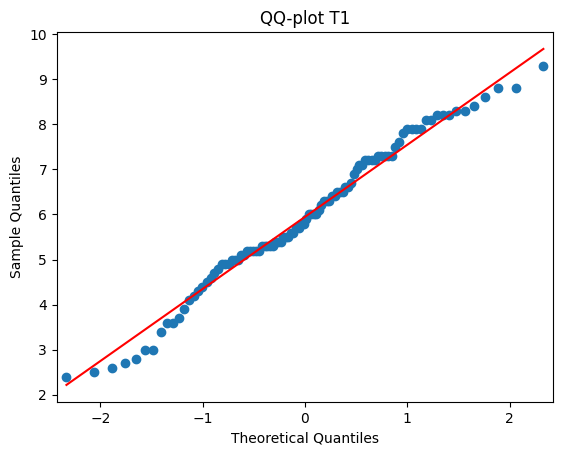

In [22]:
# 1. Mô tả và khảo sát phân phối T1
print("\nMô tả T1:\n", df['T1'].describe())
plt.figure()
sns.boxplot(y='T1', data=df)
plt.title('Boxplot T1')
plt.show()

plt.figure()
df['T1'].hist()
plt.title('Histogram T1')
plt.show()

import statsmodels.api as sm
plt.figure()
sm.qqplot(df['T1'], line='s')
plt.title('QQ-plot T1')
plt.show()

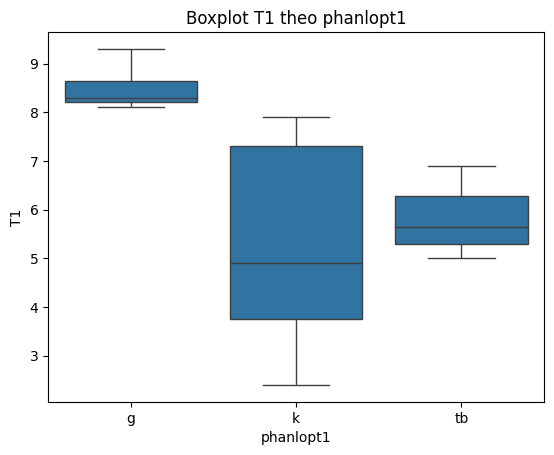

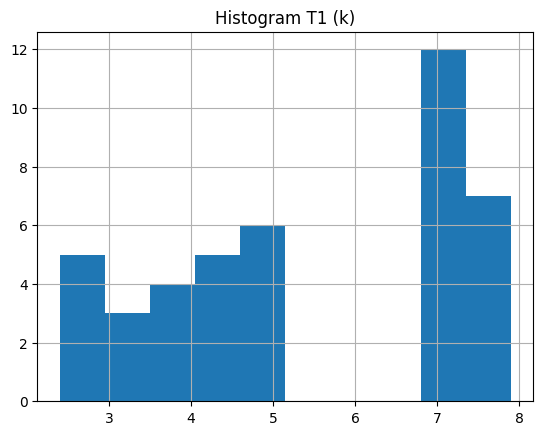

<Figure size 640x480 with 0 Axes>

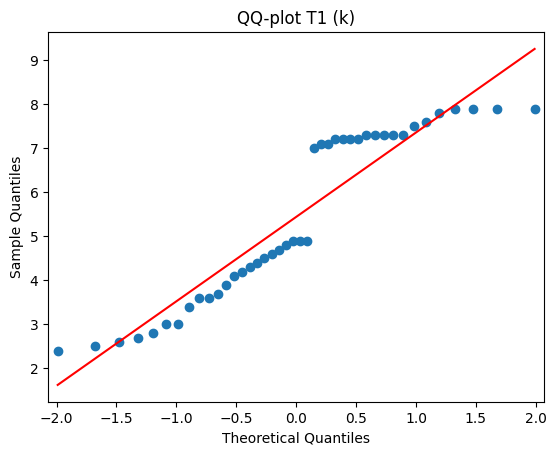

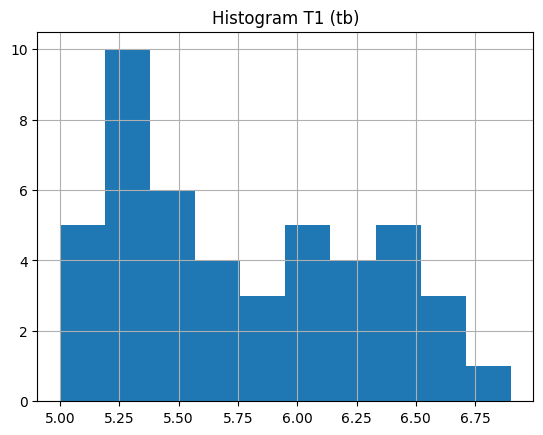

<Figure size 640x480 with 0 Axes>

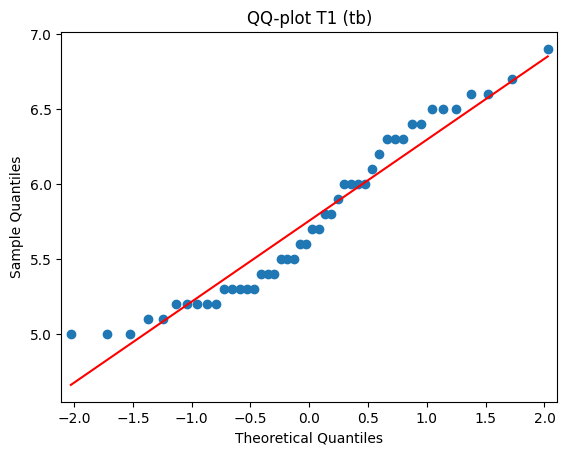

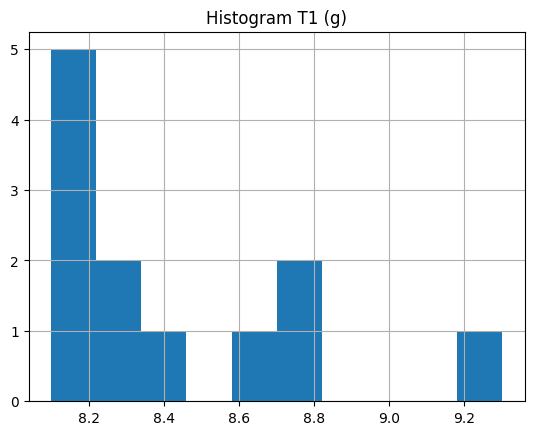

<Figure size 640x480 with 0 Axes>

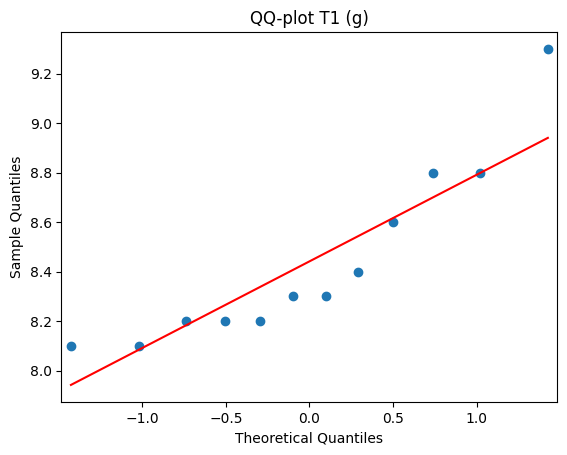

In [23]:
# 2. Mô tả và khảo sát phân phối T1 theo phanlopt1
sns.boxplot(x='phanlopt1', y='T1', data=df)
plt.title('Boxplot T1 theo phanlopt1')
plt.show()

for cat in df['phanlopt1'].unique():
    plt.figure()
    df[df['phanlopt1'] == cat]['T1'].hist()
    plt.title(f'Histogram T1 ({cat})')
    plt.show()

    plt.figure()
    sm.qqplot(df[df['phanlopt1'] == cat]['T1'], line='s')
    plt.title(f'QQ-plot T1 ({cat})')
    plt.show()



Tương quan DH1 và T1:
           DH1        T1
DH1  1.000000  0.049254
T1   0.049254  1.000000


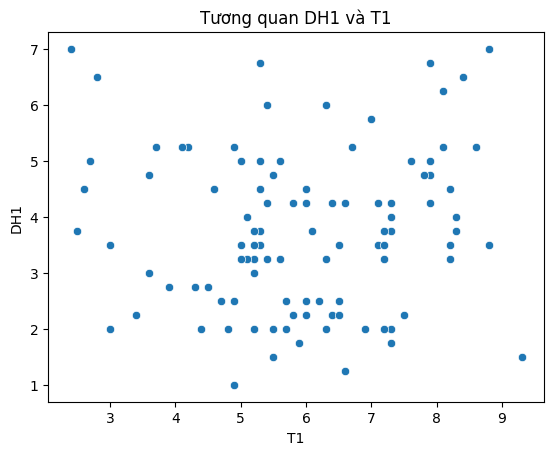

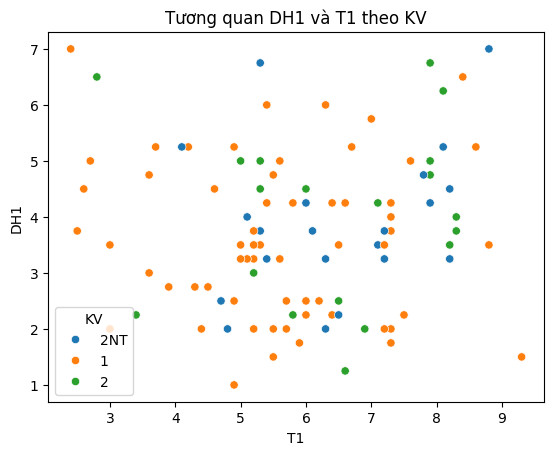

In [24]:
# 3, 4. Tương quan DH1 và T1
print("\nTương quan DH1 và T1:\n", df[['DH1', 'T1']].corr())
sns.scatterplot(x='T1', y='DH1', data=df)
plt.title('Tương quan DH1 và T1')
plt.show()

sns.scatterplot(x='T1', y='DH1', hue='KV', data=df)
plt.title('Tương quan DH1 và T1 theo KV')
plt.show()


Tương quan DH1, DH2, DH3:
           DH1       DH2       DH3
DH1  1.000000  0.035154  0.018731
DH2  0.035154  1.000000 -0.091523
DH3  0.018731 -0.091523  1.000000


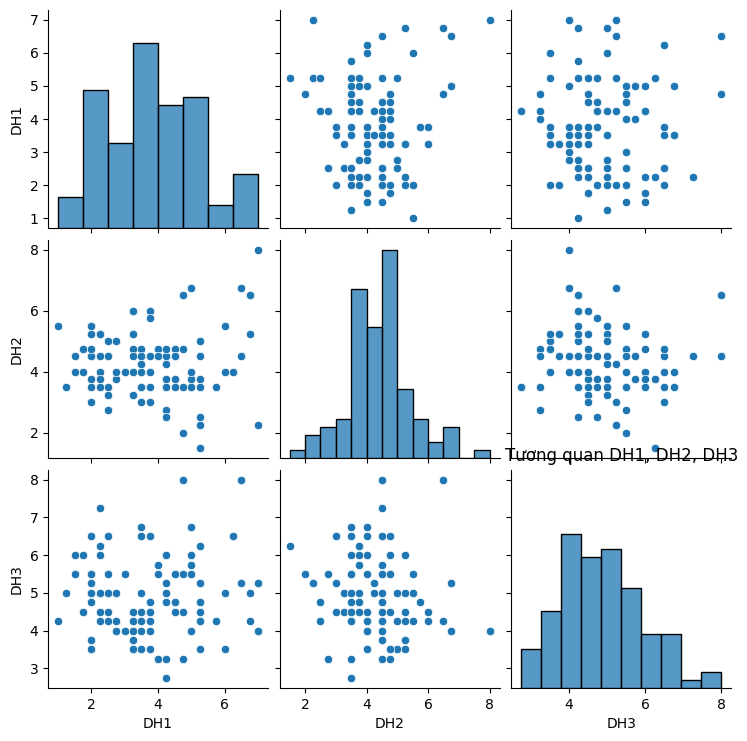

In [25]:
# 5. Tương quan DH1, DH2, DH3
print("\nTương quan DH1, DH2, DH3:\n", df[['DH1', 'DH2', 'DH3']].corr())
sns.pairplot(df[['DH1', 'DH2', 'DH3']])
plt.title('Tương quan DH1, DH2, DH3')
plt.show()